<a href="https://colab.research.google.com/github/KietHuynh02/EXERCISE_WEEK_4/blob/main/conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2116c0bbaf4086712798afe65355e57e6f520c8babb60a3ac4b53995bc4cc47e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


91.66161822220573


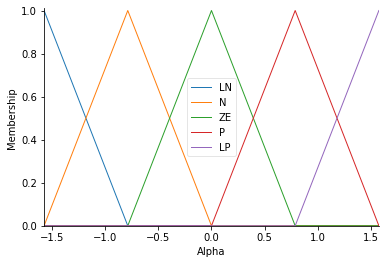

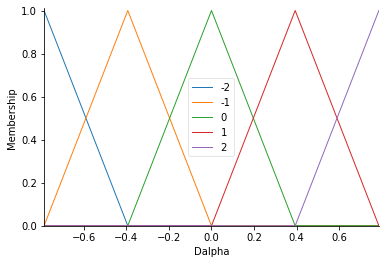

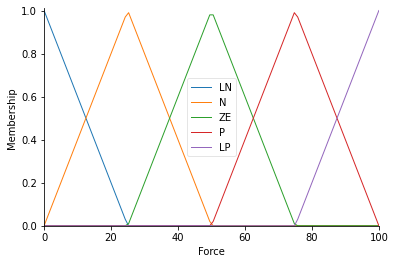

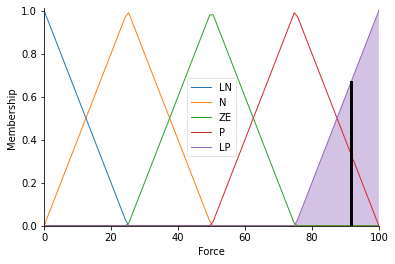

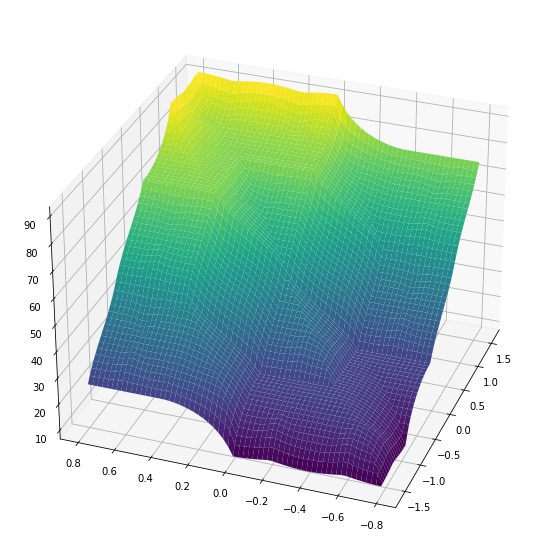

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


universe = np.linspace(-np.pi/2,np.pi/2,61)
universe1 = np.linspace(-np.pi/4,np.pi/4,61)
universe2 = np.linspace(0,100,100)

alpha=ctrl.Antecedent(universe,'Alpha')
dalpha=ctrl.Antecedent(universe1,'Dalpha')
force=ctrl.Consequent(universe2,'Force')
namesDirect=['LN','N','ZE','P','LP']
namesTrend=['-2','-1','0','1','2']

alpha.automf(names=namesDirect)
dalpha.automf(names=namesTrend)
force.automf(names=namesDirect)

alpha.view()
dalpha.view()
force.view()

rule=[]
rule.append(ctrl.Rule(antecedent=((alpha['LN'] & dalpha['-2'])|(alpha['LN'] & dalpha['-1'])|(alpha['LN'] & dalpha['0'])|
                                  (alpha['N'] & dalpha['-2'])),consequent=force['LN'],label='rule LN'))
rule.append(ctrl.Rule(antecedent=((alpha['ZE'] & dalpha['-2'])|(alpha['N'] & dalpha['-1'])|(alpha['ZE'] & dalpha['-1'])|
                                  (alpha['N'] & dalpha['0'])|(alpha['LN'] & dalpha['1'])|(alpha['LN'] & dalpha['2'])),consequent=force['N'],label='rule N'))
rule.append(ctrl.Rule(antecedent=((alpha['P'] & dalpha['-2'])|(alpha['P'] & dalpha['-1'])|(alpha['ZE'] & dalpha['0'])|
                                  (alpha['N'] & dalpha['1'])|(alpha['N'] & dalpha['2'])),consequent=force['ZE'],label='rule ZE'))
rule.append(ctrl.Rule(antecedent=((alpha['LP'] & dalpha['-2'])|(alpha['LP'] & dalpha['-1'])|(alpha['P'] & dalpha['0'])|
                                  (alpha['P'] & dalpha['1'])|(alpha['ZE'] & dalpha['1'])|(alpha['ZE'] & dalpha['2'])),consequent=force['P'],label='rule P'))
rule.append(ctrl.Rule(antecedent=((alpha['LP'] & dalpha['0'])|(alpha['LP'] & dalpha['1'])|(alpha['LP'] & dalpha['2'])|(alpha['P'] & dalpha['2'])),consequent=force['LP'],label='rule LP'))


force_ctrl = ctrl.ControlSystem(rule)
FORCE=ctrl.ControlSystemSimulation(force_ctrl,flush_after_run=61*61+1)

FORCE.input['Alpha'] = np.pi/4
FORCE.input['Dalpha'] = 1

FORCE.compute()

print(FORCE.output['Force'])

force.view(sim = FORCE)

upsampled=np.linspace(-np.pi/2,np.pi/2,61)
upsampled1=np.linspace(-np.pi/4,np.pi/4,61)
x,y = np.meshgrid(upsampled,upsampled1)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    FORCE.input['Alpha']=x[i,j]
    FORCE.input['Dalpha']=y[i,j]
    FORCE.compute()
    z[i,j]=FORCE.output['Force']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)